# Taller Clustering

**Objetivos del Taller**

- Entender los conceptos básicos de clustering (agrupamiento no supervisado) y su aplicación en finanzas.
- Aprender a utilizar los algoritmos K-Means (K-medias) y clustering jerárquico para agrupar fondos de inversión según características cuantitativas.
- Aprender a utilizar la herramienta GraphExt (https://www.graphext.com).
- Practicar la limpieza y preprocesamiento de datos financieros (precios históricos de fondos).
- Extraer características cuantitativas de los activos y comprender su significado financiero.
- Aplicar PCA y K-Means sobre estas características para identificar clústeres de fondos similares.
- Visualizar los resultados de clustering para interpretar los grupos.
- Interpretación financiera de los clústeres y discutir los resultados.

**Estructura del Taller**

- Presentación: Presentación de objetivos, repaso de aprendizaje no supervisado vs. supervisado, importancia del clustering en análisis financiero.
- Limpieza y preprocesamiento de datos: Carga del dataset de precios históricos de fondos, identificación de datos faltantes o anómalos, y técnicas de limpieza.
- Ingeniería de características: Cálculo de variables cuantitativas y preparación de la matriz de características para clustering.
- Aplicación de PCA (Análisis de Componentes Principales): Aplicación para reducción de dimensionalidad.
- Algoritmo K-Means, GraphExt y HAC: Clustering con distintos algoritmos.
- Discusión de resultados y conclusiones: Puesta en común de hallazgos, interpretación de clústeres, recomendaciones finales y cierre.

**Tesis Financiera**

Como gestor, creemos que el mercado asiático va a tener un buen comportamiento el próximo año, por lo tanto, queremos posicionar nuestro fondo de fondos con un claro sesgo a este mercado.

**Dataset**

- Valores liquidativos de 25.000 fondos de inversión entre 2016-01-05 y 2021-07-16 proporcionados por IronIA.
- Factores de Fama & French (Mkt-RF, SMB, HML, MOM) de Asia Pacífico ex Japón.
- Valores liquidativos de *iShares MSCI All Country Asia ex Japan ETF (AAXJ)*. **Queda prohibido su uso para extracción de características**. Se utilizará solamente como TEST al final del ejercicio.


## Lectura de datos

### NAV Fondos

In [1]:
import pickle as pkl
import pandas as pd
import numpy as np
import missingno as mso
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Leemos los datos en crudo del pickle.
raw_data = pkl.load(open("./dataset/navs.pickle", "rb"))

C:\Users\pventura\AppData\Local\Temp\ipykernel_26088\3264667221.py:2: DeprecationWarning: numpy.core.numeric is deprecated and has been renamed to numpy._core.numeric. The numpy._core namespace contains private NumPy internals and its use is discouraged, as NumPy internals can change without warning in any release. In practice, most real-world usage of numpy.core is to access functionality in the public NumPy API. If that is the case, use the public NumPy API. If not, you are using NumPy internals. If you would still like to access an internal attribute, use numpy._core.numeric._frombuffer.
  raw_data = pkl.load(open("./dataset/navs.pickle", "rb"))


In [3]:
# Miramos el tipo de datos.
type(raw_data)

dict

In [4]:
# Es un diccionario. Miramos las claves.
raw_data.keys()

dict_keys([90, 541, 909, 915, 922, 1625, 1626, 1905, 3395, 6214, 6215, 6216, 6217, 6218, 6219, 6220, 6221, 6343, 6344, 6345, 6346, 6353, 6362, 6366, 6369, 6370, 6376, 6395, 6396, 6405, 6406, 6420, 6427, 6434, 6436, 6437, 6442, 6445, 6454, 6457, 6460, 6465, 6472, 6478, 6479, 6484, 6491, 6499, 6506, 6519, 6536, 6541, 6542, 6543, 6544, 6578, 6579, 6583, 6584, 6685, 8004, 8006, 8008, 8010, 8011, 8012, 8013, 8015, 8022, 8024, 8026, 8030, 8033, 8034, 8035, 8037, 8049, 8050, 8051, 8052, 8053, 8054, 8055, 8056, 8057, 8058, 8059, 8061, 8062, 8063, 8064, 8067, 8068, 8069, 8072, 8073, 8074, 8075, 8076, 8077, 8078, 8079, 8080, 8081, 8082, 8083, 8084, 8087, 8088, 8089, 8091, 8101, 8102, 8103, 8104, 8105, 8106, 8108, 8109, 8110, 8113, 8114, 8118, 8119, 8120, 8121, 8123, 8124, 8125, 8126, 8239, 8242, 9807, 9808, 10001, 10003, 10011, 10013, 10015, 10016, 10017, 10020, 10322, 10783, 10784, 11002, 11008, 11010, 11011, 11013, 11019, 11020, 11021, 11027, 11028, 11029, 11032, 11035, 11039, 11041, 11042, 11

In [5]:
# Miramos la primera clave.
raw_data[90]

isin  allfunds_id    nav  \
date                                           
2016-01-05  LU0171310443           90  16.47   
2016-01-06  LU0171310443           90  16.19   
2016-01-07  LU0171310443           90  15.68   
2016-01-08  LU0171310443           90  15.59   
2016-01-11  LU0171310443           90  15.26   
...                  ...          ...    ...   
2021-07-12  LU0171310443           90  70.55   
2021-07-13  LU0171310443           90  70.85   
2021-07-14  LU0171310443           90  71.19   
2021-07-15  LU0171310443           90  70.36   
2021-07-16  LU0171310443           90  69.71   

                                                name  
date                                                  
2016-01-05           BGF WORLD TECHNOLOGY "A2" (EUR)  
2016-01-06           BGF WORLD TECHNOLOGY "A2" (EUR)  
2016-01-07           BGF WORLD TECHNOLOGY "A2" (EUR)  
2016-01-08           BGF WORLD TECHNOLOGY "A2" (EUR)  
2016-01-11           BGF WORLD TECHNOLOGY "A2" (EUR)  
...                                              ...  
2021-07-12  BGF WORLD TECHNOLOGY "A2" (EUR) (FR)      
2021-07-13  BGF WORLD TECHNOLOGY "A2" (EUR)           
2021-07-14  BGF WORLD TECHNOLOGY "A2" (EUR)           
2021-07-15  BGF WORLD TECHNOLOGY "A2" (EUR) (FR)      
2021-07-16  BGF WORLD TECHNOLOGY "A2" (EUR)           

[1387 rows x 4 columns]

In [6]:
# Tenemos un diccionario de DataFrames.
# Asumimos que todos los DataFrames tienen la misma estructura.
# Tienen índice DatetimeIndex y los tipos de datos de las columnas no hay que transformarlos.
raw_data[90].info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1387 entries, 2016-01-05 to 2021-07-16
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   isin         1387 non-null   object 
 1   allfunds_id  1387 non-null   int64  
 2   nav          1387 non-null   float64
 3   name         1387 non-null   object 
dtypes: float64(1), int64(1), object(2)
memory usage: 54.2+ KB


In [7]:
# Concatenamos todos los DataFrames en uno solo por filas, dada la estructura del DataFrame.
# Luego pasamos de formato largo a ancho.
data_nav = pd.concat(raw_data.values(), axis=0)
data_nav = data_nav.reset_index()
data_nav = data_nav.pivot_table(
    index="date",
    columns="isin",
    values="nav",
    aggfunc="first",
)
data_nav.shape

(2020, 24819)

In [8]:
data_nav.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2020 entries, 2016-01-05 to 2021-07-16
Columns: 24819 entries, AT0000494893 to NL0006238131
dtypes: float64(24819)
memory usage: 382.5 MB


### Factores Fama & French

Ref.: https://mba.tuck.dartmouth.edu/pages/faculty/ken.french/data_library.html

In [9]:
data_asia_pacific_ex_japan_3_factors_daily = pd.read_csv(
    "./dataset/Asia_Pacific_ex_Japan_3_Factors_Daily.csv",
    index_col="Date",
    parse_dates=True,
)
data_asia_pacific_ex_japan_3_factors_daily = data_asia_pacific_ex_japan_3_factors_daily / 100
data_asia_pacific_ex_japan_3_factors_daily

Mkt-RF     SMB     HML      RF
Date                                      
1990-07-02  0.0040 -0.0009  0.0060  0.0003
1990-07-03  0.0086 -0.0064  0.0030  0.0003
1990-07-04  0.0128 -0.0029 -0.0030  0.0003
1990-07-05  0.0020 -0.0057 -0.0034  0.0003
1990-07-06 -0.0007 -0.0016  0.0042  0.0003
...            ...     ...     ...     ...
2025-03-25  0.0003  0.0002 -0.0025  0.0002
2025-03-26  0.0040 -0.0007 -0.0015  0.0002
2025-03-27  0.0021 -0.0028  0.0058  0.0002
2025-03-28 -0.0028  0.0053 -0.0001  0.0002
2025-03-31 -0.0159  0.0021  0.0117  0.0002

[9066 rows x 4 columns]

In [10]:
data_asia_pacific_ex_japan_3_factors_daily.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9066 entries, 1990-07-02 to 2025-03-31
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Mkt-RF  9066 non-null   float64
 1   SMB     9066 non-null   float64
 2   HML     9066 non-null   float64
 3   RF      9066 non-null   float64
dtypes: float64(4)
memory usage: 354.1 KB


In [11]:
data_asia_pacific_ex_japan_3_factors_daily.describe()

Mkt-RF          SMB          HML           RF
count  9066.000000  9066.000000  9066.000000  9066.000000
mean      0.000253    -0.000165     0.000247     0.000099
std       0.010334     0.005685     0.005512     0.000089
min      -0.103200    -0.056900    -0.037200     0.000000
25%      -0.004600    -0.003000    -0.002800     0.000000
50%       0.000400     0.000000     0.000200     0.000100
75%       0.005500     0.003000     0.003100     0.000200
max       0.100000     0.049000     0.051100     0.000300

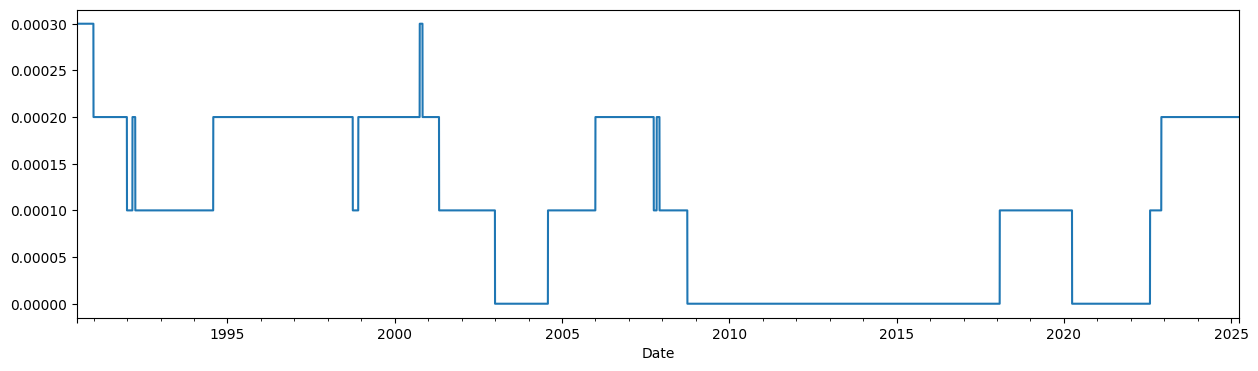

In [12]:
data_asia_pacific_ex_japan_3_factors_daily.loc[:, "RF"].plot(figsize=(15, 4))
plt.show()

In [13]:
data_asia_pacific_ex_japan_MOM_factor_daily = pd.read_csv(
    "./dataset/Asia_Pacific_ex_Japan_MOM_Factor_Daily.csv",
    index_col="Date",
    parse_dates=True,
)
data_asia_pacific_ex_japan_MOM_factor_daily.columns = ["MOM"]
data_asia_pacific_ex_japan_MOM_factor_daily = data_asia_pacific_ex_japan_MOM_factor_daily / 100
data_asia_pacific_ex_japan_MOM_factor_daily

MOM
Date              
1990-11-01  0.0072
1990-11-02  0.0096
1990-11-05 -0.0141
1990-11-06 -0.0013
1990-11-07  0.0001
...            ...
2025-03-25  0.0018
2025-03-26  0.0029
2025-03-27  0.0011
2025-03-28  0.0023
2025-03-31  0.0111

[8978 rows x 1 columns]

In [14]:
data_asia_pacific_ex_japan_MOM_factor_daily.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8978 entries, 1990-11-01 to 2025-03-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   MOM     8978 non-null   float64
dtypes: float64(1)
memory usage: 140.3 KB


In [15]:
data_asia_pacific_ex_japan_MOM_factor_daily.describe()

MOM
count  8978.000000
mean      0.000422
std       0.007403
min      -0.104200
25%      -0.002600
50%       0.000600
75%       0.004000
max       0.092800

## Limpieza de datos

In [ ]:
# TODO: Efectúa la limpieza y alinea los datos.

## Filtrado de fondos Asia Pacific ex-Japan

In [ ]:
import statsmodels.api as sm


def run_ordinary_least_squares(X: pd.Series, Y: pd.Series) -> tuple:
    """Ejecuta una regresión lineal y devuelve el modelo de regresión.

    Args:
        X (pd.Series): Variable independiente.
        Y (pd.Series): Variable dependiente

    Returns:
        Modelo de regresión.
    """
    X = sm.add_constant(X)

    model = sm.OLS(Y, X).fit()

    return model

In [ ]:
# TODO: Prepara los datos y filtra los fondos que nos interesan.

## Extracción de características

* **Exceso de rendimiento del fondo** respecto del mercado asiático de referencia ([Fondo-Rf] - ["Mkt-Rf]) a 1, 3 y 5 años.
* **Desviación estándar** a 1, 3 y 5 años.
* **Up-Market Capture Ratio**  a 1, 3 y 5 años: Mide el rendimiento relativo a un índice durante los mercados alcistas.
$ \text{Up-Market Capture Ratio}=\frac{\text{Portfolio return during Up-Market periods}}{\text{Benchmark return during Up-Market periods}} \times 100 $
* **Down-Market Capture Ratio**  a 1, 3 y 5 años: Mide el rendimiento relativo a un índice durante los mercados bajistas.
$ \text{Down-Market Capture Ratio}=\frac{\text{Portfolio return during Down-Market periods}}{\text{Benchmark return during Down-Market periods}} \times 100 $
* **Beta** de las regresiones con los 4 factores a 1, 3 y 5 años.

In [ ]:
def calcular_exceso_rentabilidad(funds: pd.DataFrame, market: pd.Series) -> pd.DataFrame:
    """Calcula la diferencia acumulada entre "funds" y "market".

    Args:
        funds (pd.DataFrame): Retornos de los fondos.
        market (pd.Series): Retornos del mercado.

    Returns:
        pd.DataFrame: Diferencia acumulada por fondo.
    """
    diff = funds.subtract(market, axis=0)
    diff = diff.sum(axis=0)

    return diff

In [ ]:
def calcular_desviacion_standar(funds: pd.DataFrame) -> pd.DataFrame:
    """Calcula la desviación estándar de los fondos.

    Args:
        funds (pd.DataFrame): Retornos de los fondos.

    Returns:
        pd.DataFrame: Desviación estándar por fondo.
    """
    std = funds.std(axis=0)

    return std

In [ ]:
def calcular_up_market_capture_ratio(funds: pd.DataFrame, market: pd.Series) -> pd.DataFrame:
    """Calcula el up market capture ratio de los fondos.

    Args:
        funds (pd.DataFrame): Retornos de los fondos.
        market (pd.Series): Retornos del mercado.

    Returns:
        pd.DataFrame: Up market capture ratio por fondo.
    """
    # Filtramos los días donde el los fondos suben.
    funds_up_days_mask = funds > 0
    funds_up_days_mask = funds_up_days_mask.astype(int)
    funds_up_days = funds * funds_up_days_mask
    funds_up_days = funds_up_days.sum(axis=0)

    # Filtramos los días donde el mercado sube.
    market_up_days_mask = market > 0
    market_up_days_mask = market_up_days_mask.astype(int)
    market_up_days = market * market_up_days_mask
    market_up_days = market_up_days.sum(axis=0)

    # Calculamos el up market capture ratio.
    ratio = funds_up_days / market_up_days

    return ratio

In [ ]:
def calcular_down_market_capture_ratio(funds: pd.DataFrame, market: pd.Series) -> pd.DataFrame:
    """Calcula el down market capture ratio de los fondos.

    Args:
        funds (pd.DataFrame): Retornos de los fondos.
        market (pd.Series): Retornos del mercado.

    Returns:
        pd.DataFrame: Down market capture ratio por fondo.
    """
    # Filtramos los días donde el los fondos bajan.
    funds_down_days_mask = funds < 0
    funds_down_days_mask = funds_down_days_mask.astype(int)
    funds_down_days = funds * funds_down_days_mask
    funds_down_days = funds_down_days.sum(axis=0)

    # Filtramos los días donde el mercado baja.
    market_down_days_mask = market < 0
    market_down_days_mask = market_down_days_mask.astype(int)
    market_down_days = market * market_down_days_mask
    market_down_days = market_down_days.sum(axis=0)

    # Calculamos el down market capture ratio.
    ratio = funds_down_days / market_down_days

    return ratio

In [ ]:
def calcular_regresion_lineal(fund: pd.Series, factor: pd.Series) -> dict:
    """Calcula la regresión lineal entre un fondo y un factor.

    Args:
        fund (pd.Series): Retornos del fondo
        factor (pd.Series): Factor de riesgo

    Returns:
        dict: Diccionario con los resultados de la regresión.
    """
    factor_name = factor.name
    model = run_ordinary_least_squares(factor, fund)

    # Extraemos los resultados de la regresión.
    alpha = model.params["const"]
    beta = model.params[factor.name]
    r2 = model.rsquared
    alpha_pvalue = model.pvalues["const"]
    beta_pvalue = model.pvalues[factor.name]
    alpha_tvalue = model.tvalues["const"]
    beta_tvalue = model.tvalues[factor.name]
    alpha_tvalue_adjusted = alpha * (1 - np.exp(-1 * np.abs(alpha_tvalue)))
    beta_tvalue_adjusted = beta * (1 - np.exp(-1 * np.abs(beta_tvalue)))

    # Guardamos los resultados en un diccionario.
    results = {
        f"{factor_name}_Alpha": alpha,
        f"{factor_name}_Beta": beta,
        f"{factor_name}_R2": r2,
        f"{factor_name}_Alpha p-value": alpha_pvalue,
        f"{factor_name}_Beta p-value": beta_pvalue,
        f"{factor_name}_Alpha t-value": alpha_tvalue,
        f"{factor_name}_Beta t-value": beta_tvalue,
        f"{factor_name}_Alpha t-value adjusted": alpha_tvalue_adjusted,
        f"{factor_name}_Beta t-value adjusted": beta_tvalue_adjusted,
    }
    return results

In [ ]:
# TODO: Realizar extracción de características para todos los fondos.

## PCA + Clustering con KMeans

In [ ]:
# TODO: Realiza PCA para reducir la dimensionalidad de los datos.
# TODO: Interpreta autovectores y autovalores. Selecciona el número de componentes principales.
# TODO: Realiza la proyección de los datos en el espacio de los componentes principales.
# TODO: Realiza clustering con KMeans (selecciona el k adecuado) en los datos proyectados.
# TODO: Examina e interpreta los centroides de los clusters.
# TODO: Selecciona el cluster que más te interese y filtra los fondos.
# TODO: Descarga los datos del ETF AAXJ y compara su comportamiento con los fondos seleccionados.

## Clustering con GraphExt

In [ ]:
# TODO: Prepara los datos para exportar a GraphExt.
# TODO: Realiza clustering de los fondos seleccionados usando k-NNG y UMAP.
# TODO: Visualiza los datos de los distintos clusters.

## Clustering Jerárquico Aglomerativo

In [ ]:
# TODO: Realiza clustering de los fondos seleccionados usando HAC.
# TODO: Visualiza los datos de los distintos clusters.


In [ ]:
# TODO: ¿Próximos pasos?